In [1]:
#ucitavanej biblioteka

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
#ucitavanje anotacija i zadrzavanje samo onih koje se odnose na gene

# za koristenje treba promijeniti path!

from gtfparse import read_gtf

df = read_gtf("C:/Users/zg/Desktop/uzop/anotacije/anotacije.gtf")

df_genes = df[df["feature"] == "gene"]

df_genes

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_status', 'gene_name', 'level', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_status', 'transcript_name', 'tag', 'transcript_support_level', 'havana_transcript', 'exon_number', 'exon_id', 'ont', 'protein_id', 'ccdsid']


,seqname,source,feature,start,end,score,strand,frame,gene_id,gene_type,...,transcript_status,transcript_name,tag,transcript_support_level,havana_transcript,exon_number,exon_id,ont,protein_id,ccdsid
0,chr1,HAVANA,gene,11869,14409,NaN,+,0,ENSG00000223972.5,transcribed_unprocessed_pseudogene,...,,,,,,,,,,
12,chr1,HAVANA,gene,14404,29570,NaN,-,0,ENSG00000227232.5,unprocessed_pseudogene,...,,,,,,,,,,
25,chr1,ENSEMBL,gene,17369,17436,NaN,-,0,ENSG00000278267.1,miRNA,...,,,,,,,,,,
28,chr1,HAVANA,gene,29554,31109,NaN,+,0,ENSG00000243485.3,lincRNA,...,,,ncRNA_host,,,,,,,
36,chr1,ENSEMBL,gene,30366,30503,NaN,+,0,ENSG00000274890.1,miRNA,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563652,chrM,ENSEMBL,gene,14149,14673,NaN,-,0,ENSG00000198695.2,protein_coding,...,,,,,,,,,,
2563657,chrM,ENSEMBL,gene,14674,14742,NaN,-,0,ENSG00000210194.1,Mt_tRNA,...,,,,,,,,,,
2563660,chrM,ENSEMBL,gene,14747,15887,NaN,+,0,ENSG00000198727.2,protein_coding,...,,,,,,,,,,
2563665,chrM,ENSEMBL,gene,15888,15953,NaN,+,0,ENSG00000210195.2,Mt_tRNA,...,,,,,,,,,,


In [3]:
#spremanje anotacija gena
just_genes=df_genes[["gene_id","gene_name", "start", "end"]]

length=just_genes["end"]-just_genes["start"]
just_genes_final=just_genes[["gene_id","gene_name"]]
just_genes_final["length"]=length

just_genes_final.to_csv('anotations_check.csv',index=False)  

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
C:\Users\zg\AppData\Local\Temp/ipykernel_896/3906930876.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  just_genes_final["length"]=length


In [4]:
#ucitavanje metabolickih gena
# za koristenje treba promijeniti path!
mgenes=pd.read_csv('C:/Users/zg/Desktop/uzop/metabolicki_geni/mgen_final.csv', sep=',')
mgenes["Gene Symbol"]

0          ABCA1
1         ABCA10
2         ABCA12
3         ABCA13
4          ABCA2
          ...   
2747        PDXP
2748    PHOSPHO2
2749        PNPO
2750        DCXR
2751        XYLB
Name: Gene Symbol, Length: 2752, dtype: object

In [5]:
#ucitavanje icgc dataseta
# za koristenje treba promijeniti path!
exp_seq=pd.read_csv('C:/Users/zg/Desktop/uzop/icgc_dataset/exp_seq.tsv', sep='\t')
exp_seq

,icgc_donor_id,project_code,icgc_specimen_id,icgc_sample_id,submitted_sample_id,analysis_id,gene_model,gene_id,normalized_read_count,raw_read_count,...,platform,total_read_count,experimental_protocol,alignment_algorithm,normalization_algorithm,other_analysis_algorithm,sequencing_strategy,raw_data_repository,raw_data_accession,reference_sample_type
0,DO50855,LIRI-JP,SP112300,SA595602,RK326_Cancer,RK326_Cancer-rnaseq,RefSeq,MPP2,0.227221,3608,...,Illumina HiSeq,4345596711,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000125321...,NaN
1,DO50855,LIRI-JP,SP112300,SA595602,RK326_Cancer,RK326_Cancer-rnaseq,RefSeq,TMEM189-UBE2V1,35.203400,446395,...,Illumina HiSeq,4345596711,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000125321...,NaN
2,DO50855,LIRI-JP,SP112300,SA595602,RK326_Cancer,RK326_Cancer-rnaseq,RefSeq,ELF3,93.659713,1275154,...,Illumina HiSeq,4345596711,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000125321...,NaN
3,DO50855,LIRI-JP,SP112300,SA595602,RK326_Cancer,RK326_Cancer-rnaseq,RefSeq,SPEG,1.126416,6104,...,Illumina HiSeq,4345596711,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000125321...,NaN
4,DO50855,LIRI-JP,SP112300,SA595602,RK326_Cancer,RK326_Cancer-rnaseq,RefSeq,PTPN20A,0.215507,59,...,Illumina HiSeq,4345596711,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000125321...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8342109,DO23508,LIRI-JP,SP191914,SA594394,RK028_Liver,RK028_Liver-rnaseq,RefSeq,PEX11G,8.590882,47800,...,Illumina HiSeq,5239207831,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000134221...,NaN
8342110,DO23508,LIRI-JP,SP191914,SA594394,RK028_Liver,RK028_Liver-rnaseq,RefSeq,CHTF18,2.222661,35983,...,Illumina HiSeq,5239207831,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000134221...,NaN
8342111,DO23508,LIRI-JP,SP191914,SA594394,RK028_Liver,RK028_Liver-rnaseq,RefSeq,TXNDC6,0.290381,1958,...,Illumina HiSeq,5239207831,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000134221...,NaN
8342112,DO23508,LIRI-JP,SP191914,SA594394,RK028_Liver,RK028_Liver-rnaseq,RefSeq,ZNF33A,5.197574,166682,...,Illumina HiSeq,5239207831,Paired End http://www.illumina.com/technology/...,bwa-0.5.8a http://bio-bwa.sourceforge.net/,FKPM http://dx.doi.org/10.1371/journal.pone.01...,NaN,RNA-Seq,EGA,EGAS00001000678:EGAD00001001880:EGAN0000134221...,NaN


In [6]:
#atributi icgc dataset-a
print("ATRIBUTI DATASET-A: ")
exp_seq.columns.values


ATRIBUTI DATASET-A: 


array(['icgc_donor_id', 'project_code', 'icgc_specimen_id',
       'icgc_sample_id', 'submitted_sample_id', 'analysis_id',
       'gene_model', 'gene_id', 'normalized_read_count', 'raw_read_count',
       'fold_change', 'assembly_version', 'platform', 'total_read_count',
       'experimental_protocol', 'alignment_algorithm',
       'normalization_algorithm', 'other_analysis_algorithm',
       'sequencing_strategy', 'raw_data_repository', 'raw_data_accession',
       'reference_sample_type'], dtype=object)

In [7]:
#odabir samo bitnih stupaca
exp_seq_final=exp_seq[["icgc_donor_id", "gene_id", "raw_read_count"]]

In [8]:
#odbacivanje svih gena koji nisu metabolicki iz dataset-a
icgc_important_columns=exp_seq_final[exp_seq_final['gene_id'].isin(mgenes["Gene Symbol"])]
icgc_important_columns=icgc_important_columns.reset_index(drop=True)

In [9]:
#batch_icgc = np.full(len(icgc_important_columns), 1)
#icgc_important_columns['batch']=batch_icgc
icgc_important_columns

,icgc_donor_id,gene_id,raw_read_count
0,DO50855,SGPP1,193710
1,DO50855,ACCN1,289
2,DO50855,SLC37A2,16555
3,DO50855,SLC6A11,27485
4,DO50855,DERA,130239
...,...,...,...
1089777,DO23508,COX8C,34
1089778,DO23508,KCNC3,3516
1089779,DO23508,SLC3A1,16897
1089780,DO23508,ACAD8,146259


In [10]:
#tpm, ne zeli se izvrsiti 1000000 redova i 2700 gena previse za probrojati koliko koji gen ima ocitanja
#za sada je za svaki gen koristeno da ima fiksnih 100 ocitanja


##NOVOOO !!!!!!!!!!!!!!!!!!!!!!
#presloziti tablici da je dimenzija (broj pacijenataxbroj pacijenata)

#TPM_i = 10^6 * (N_i / L_i) / [Σ_j (N_j / L_j)]  #TPM za i-ti redak dataset-a

#print(icgc_important_columns.columns)
#num_mgenes=len(mgenes["Gene Symbol"])
#print(num_mgenes)
#number_of_reads_per_gene=[]
#mgenes_list=mgenes["Gene Symbol"]

#print(number_of_reads_per_gene)
#number_of_reads=len(icgc_important_columns[icgc_important_columns['gene_id'].str.contains(mgenes_list[i])])

#num_rows=len(icgc_important_columns)
#number_of_reads_per_gene = pd.DataFrame(np.zeros((num_mgenes)))
#for i in range(num_rows):
#    row=icgc_important_columns.iloc[i]
#    gene_name=row[1]
#    for j in range(num_mgenes):
#        if(mgenes_list[j]==gene_name):   
#       number_of_reads_per_gene[0][j]=1000 number_of_reads_per_gene[0][j]+1

In [11]:
#TPM drugi pokusaj

##NOVO!!!!!!!!
#vjv nista necu ttebati raditit sa tpm-om

#length=len(icgc_important_columns['raw_read_count'])
#sum_of_nl=0
#counter=0
#for i in range(length):
#    sum_of_nl=sum_of_nl+(1000/icgc_important_columns['raw_read_count'][i])
    
#for i in range(length):
#    icgc_important_columns['raw_read_count'][i]=1000000 * (1000 /icgc_important_columns['raw_read_count'][i]) / sum_of_nl

In [12]:
# ucitavanje i obrada tcgc dataseta
#dataset je bio razlomljen po folderima
#u svakom folderu se nalazi datoteka s podacima za jednog pacijenta
#u slijedecem dijelu koda se spremaju svi path-ovi datoteka i foldera
#takoder id svakog pacijenta(koji je jednak imenu foldera u kojem se file nalazi) se sprama u listu patient_ids 

# za koristenje treba promijeniti path!



import os
counter=0
directory="C:/Users/zg/Desktop/uzop/tcgc_dataset"
subfolders=[x[0] for x in os.walk(directory)]
files=[]
folders=[]
paths=[]
patient_ids=[]
for folder in subfolders:
    folders.append(folder)
    current_file=os.listdir(folder)


    if current_file[0].endswith('.tsv') :
        files.append(current_file[0])
    else:
        files.append(current_file[1])
    path=folders[-1]+'/'+str(files[-1])
    
    patient_id=folder.lstrip('\\' + directory)
    
    patient_ids.append(patient_id)
    paths.append(path)

del patient_ids[0] # brisanje imena pocetnog foldera    
del paths[0] ## brisanje imena pocetnog foldera (koji je inace jednak patient_id-u)

In [13]:
#probno ucitavanje prvog pacijenta i odbacivanje svih gena koji nisu metabolicki
patient0=pd.read_csv(paths[0],skiprows=[0,2,3,4,5], sep='\t')
patient0['patient_id'] = patient_ids[0]
tcgc_dataset=patient0[patient0['gene_name'].isin(mgenes["Gene Symbol"])]
tcgc_dataset.reset_index(drop=True, inplace=True)
tcgc_dataset

,gene_id,gene_name,gene_type,unstranded,stranded_first,stranded_second,tpm_unstranded,fpkm_unstranded,fpkm_uq_unstranded,patient_id
0,ENSG00000000419.13,DPM1,protein_coding,950,443,507,46.5150,15.6717,23.7303,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
1,ENSG00000001036.14,FUCA2,protein_coding,4855,2742,2781,101.6739,34.2555,51.8703,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
2,ENSG00000001084.13,GCLC,protein_coding,2023,1045,1072,13.8729,4.6740,7.0774,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
3,ENSG00000001561.7,ENPP4,protein_coding,1475,720,755,18.7705,6.3241,9.5761,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
4,ENSG00000001626.16,CFTR,protein_coding,150,66,87,0.8917,0.3004,0.4549,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
...,...,...,...,...,...,...,...,...,...,...
2578,ENSG00000277161.2,PIGW,protein_coding,372,220,160,7.7630,2.6155,3.9604,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
2579,ENSG00000277893.2,SRD5A2,protein_coding,5,4,1,0.0654,0.0220,0.0334,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
2580,ENSG00000278535.5,DHRS11,protein_coding,953,474,480,10.4705,3.5277,5.3417,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
2581,ENSG00000278540.5,ACACA,protein_coding,1851,923,928,8.4005,2.8303,4.2856,0036fcec-eaed-430b-9a23-5efb2d2cc7f2


In [14]:
#ucitavanje jednog po jednog pacijenta i dodavanje u patient_just_metabolic0 tablicu

#treba minuta-dvije dok se se izvrsi
length=len(paths)
counter=0
for i in range(1, length-1):
    cur_patient=pd.read_csv(paths[i],skiprows=[0,2,3,4,5], sep='\t')
    cur_patient['patient_id'] = patient_ids[i]
    
    #print(counter)
    counter=counter+1
    cur_patient=cur_patient[cur_patient['gene_name'].isin(mgenes["Gene Symbol"])].reset_index()
    

    
    tcgc_dataset=pd.concat([tcgc_dataset, cur_patient], axis=0, ignore_index=True)

In [15]:
#odabir samo vaznih stupaca

tcgc_important_columns=tcgc_dataset[['gene_name', 'patient_id', 'tpm_unstranded']]
tcgc_important_columns

,gene_name,patient_id,tpm_unstranded
0,DPM1,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,46.5150
1,FUCA2,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,101.6739
2,GCLC,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,13.8729
3,ENPP4,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,18.7705
4,CFTR,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,0.8917
...,...,...,...
1092604,PIGW,ff12abd3-0f45-4063-afa7-fa5cad973159,6.7623
1092605,SRD5A2,ff12abd3-0f45-4063-afa7-fa5cad973159,6.3376
1092606,DHRS11,ff12abd3-0f45-4063-afa7-fa5cad973159,8.0389
1092607,ACACA,ff12abd3-0f45-4063-afa7-fa5cad973159,20.0236


In [16]:
#batch_tcgc = np.full(len(tcgc_important_columns), 0)
#tcgc_important_columns['batch']=batch_tcgc
tcgc_important_columns

,gene_name,patient_id,tpm_unstranded
0,DPM1,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,46.5150
1,FUCA2,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,101.6739
2,GCLC,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,13.8729
3,ENPP4,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,18.7705
4,CFTR,0036fcec-eaed-430b-9a23-5efb2d2cc7f2,0.8917
...,...,...,...
1092604,PIGW,ff12abd3-0f45-4063-afa7-fa5cad973159,6.7623
1092605,SRD5A2,ff12abd3-0f45-4063-afa7-fa5cad973159,6.3376
1092606,DHRS11,ff12abd3-0f45-4063-afa7-fa5cad973159,8.0389
1092607,ACACA,ff12abd3-0f45-4063-afa7-fa5cad973159,20.0236


In [17]:
print(tcgc_important_columns['tpm_unstranded'].mean())
print(icgc_important_columns[["raw_read_count"]].mean())

85.171376307267
raw_read_count    476117.173591
dtype: float64


In [18]:
#uskladivanje imena stupaca icgc dataseta sa tcgc datasetom
icgc_important_columns = icgc_important_columns.rename(columns={'gene_id': 'gene_name'})
icgc_important_columns = icgc_important_columns.rename(columns={'icgc_donor_id': 'patient_id'})
icgc_important_columns = icgc_important_columns.rename(columns={'raw_read_count': 'tpm_unstranded'})

In [19]:
icgc_pivot = icgc_important_columns.pivot_table(index='patient_id', columns=['gene_name'] , values=['tpm_unstranded'], aggfunc='mean')
icgc_pivot

tpm_unstranded                                                    \
gene_name            A1CF        A4GALT   A4GNT     AACS      AADAC AADACL2   
patient_id                                                                    
DO227643     9.369950e+05   3828.500000   202.0  15179.0  1626193.5   252.5   
DO227801     1.681016e+06  30736.500000   331.5  36001.0  2898567.0     NaN   
DO23508      9.211200e+05  12066.000000   479.0  94572.0  1466381.0     NaN   
DO23509      1.296065e+06   7005.000000   505.0  45485.0  1422745.5     NaN   
DO23510      1.279674e+06  11355.500000   963.5  41371.0  1890323.0     NaN   
...                   ...           ...     ...      ...        ...     ...   
DO50845      2.501530e+05   2841.000000     NaN  26821.0   289197.0     NaN   
DO50850      2.220072e+06  35799.500000     NaN  41721.0  2285168.0    19.0   
DO50855      8.233930e+05  13666.000000  7272.5  43236.5  1299983.0     NaN   
DO50857      1.588196e+06  14999.500000  1212.0  34013.5  1765668.5   178.0   
DO50859      2.479511e+06   5203.333333   801.0  41314.0  1691857.0   202.0   

                                              ...                 \
gene_name  AADACL3 AADACL4     AADAT   AANAT  ...         VKORC1   
patient_id                                    ...                  
DO227643       NaN     NaN   68776.0   466.5  ...  480586.500000   
DO227801       NaN   202.0  184974.0   823.5  ...  587271.000000   
DO23508        NaN     NaN  114520.5   253.5  ...  233912.500000   
DO23509        NaN    61.0  116134.0    84.0  ...  245929.000000   
DO23510        NaN     NaN  102063.5   716.0  ...  328126.500000   
...            ...     ...       ...     ...  ...            ...   
DO50845        NaN     NaN    9666.0  1308.0  ...   28794.000000   
DO50850        NaN   202.0  175021.0   141.0  ...  505948.500000   
DO50855        NaN     NaN   87538.5   488.5  ...  259783.500000   
DO50857        NaN     NaN   45319.5   202.0  ...  246121.000000   
DO50859        NaN   117.0   77130.0   404.0  ...  560366.666667   

                                                                 \
gene_name       VKORC1L1      WBSCR17           WWOX        XDH   
patient_id                                                        
DO227643    20604.000000   404.000000   31906.000000   772865.5   
DO227801    39627.500000  5229.000000  131370.500000  1010349.5   
DO23508     30193.000000  2740.000000   32318.500000   434234.5   
DO23509     77003.500000   497.500000   33760.000000   329265.0   
DO23510     47292.500000  2086.000000   46618.500000   595080.5   
...                  ...          ...            ...        ...   
DO50845      4916.000000          NaN   15447.000000    23612.0   
DO50850     73919.000000  2831.000000   74846.500000   726547.5   
DO50855     40439.500000  2288.000000   22615.500000   235238.5   
DO50857     68479.000000  3087.500000   21251.500000   379870.5   
DO50859     48064.666667   871.333333   64230.666667   625395.0   

                                                                            
gene_name            XYLB         XYLT1          XYLT2      ZACN     ZADH2  
patient_id                                                                  
DO227643     83582.000000   3042.500000   51776.000000   58838.5   98140.5  
DO227801    267191.000000  11838.500000  128557.500000   87387.5  162813.0  
DO23508      87982.500000   2720.000000  130313.500000  110881.0  153597.5  
DO23509     175653.500000   6805.500000   83326.500000   65728.5  173823.0  
DO23510     229930.500000   8131.000000   72090.500000   56108.5  117644.0  
...                   ...           ...            ...       ...       ...  
DO50845      19231.000000    549.000000   40911.000000   64400.0   27308.0  
DO50850     285072.500000  16231.000000  100769.500000   75451.5  275838.5  
DO50855     101188.000000   6651.000000   97314.500000   83907.5  109055.0  
DO50857     239832.000000  23037.000000   80883.500000   44827.5  152192.0  
DO50859    

In [20]:
tcgc_pivot = tcgc_important_columns.pivot_table(index='patient_id', columns=['gene_name'] , values=['tpm_unstranded'], aggfunc='mean')
tcgc_pivot

tpm_unstranded                           \
gene_name                                      A1CF   A4GALT   A4GNT    AACS   
patient_id                                                                     
0010d2-52db-4b15-a750-dd57d148520b          45.0047   1.6876  0.0253  1.7302   
0036fcec-eaed-430b-9a23-5efb2d2cc7f2         7.8466  21.1544  0.1329  6.5624   
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee        15.7228   1.7479  0.0000  0.3846   
00ab5e4-51b3-4dc3-ae27-106496e90687         39.9765   4.2160  0.0000  1.8337   
00fb4b52-e6a4-4ad9-bbed-584e25851aca        48.1475   6.0541  0.0316  2.8397   
...                                             ...      ...     ...     ...   
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c         30.7357   0.5647  0.0000  0.9715   
fe9e4c81-7149-4cfd-b1a2-60884268988b        24.9393   0.7715  0.0000  1.9382   
feb06cd1-e6f5-4e39-9b19-a6479f751c38        40.0200   1.3189  0.0000  1.0562   
ff12abd3-0f45-4063-afa7-fa5cad973159        58.8443   2.3870  0.0000  0.9860   
ffbcbe-e490-4bcf-95db-d454bf8df300          44.6252   8.8213  0.0000  4.8804   

                                                                         \
gene_name                                 AADAC AADACL2 AADACL3 AADACL4   
patient_id                                                                
0010d2-52db-4b15-a750-dd57d148520b     663.6808  0.0000     0.0  0.0000   
0036fcec-eaed-430b-9a23-5efb2d2cc7f2    56.6361  0.0117     0.0  0.0000   
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee    94.7180  0.0000     0.0  0.0000   
00ab5e4-51b3-4dc3-ae27-106496e90687    269.4251  0.0000     0.0  0.0000   
00fb4b52-e6a4-4ad9-bbed-584e25851aca  1493.2496  0.0000     0.0  0.0000   
...                                         ...     ...     ...     ...   
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c    100.6320  0.0000     0.0  0.0000   
fe9e4c81-7149-4cfd-b1a2-60884268988b   334.3071  0.0000     0.0  0.0000   
feb06cd1-e6f5-4e39-9b19-a6479f751c38   190.5390  0.0000     0.0  0.0351   
ff12abd3-0f45-4063-afa7-fa5cad973159   395.8973  0.0000     0.0  0.0275   
ffbcbe-e490-4bcf-95db-d454bf8df300     195.9050  0.0000     0.0  0.0556   

                                                      ...                     \
gene_name                              AADAT   AANAT  ...     VDAC3   VKORC1   
patient_id                                            ...                      
0010d2-52db-4b15-a750-dd57d148520b    2.0292  0.5424  ...  132.5686  23.4330   
0036fcec-eaed-430b-9a23-5efb2d2cc7f2  6.0690  0.3838  ...   65.0252  39.2641   
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee  5.4850  0.0556  ...   36.2060  50.9761   
00ab5e4-51b3-4dc3-ae27-106496e90687   7.5039  0.0424  ...   82.0923   8.0911   
00fb4b52-e6a4-4ad9-bbed-584e25851aca  3.5738  0.0781  ...   74.6792  27.2078   
...                                      ...     ...  ...       ...      ...   
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c   5.8017  0.1147  ...   42.3502  25.4113   
fe9e4c81-7149-4cfd-b1a2-60884268988b  1.5838  0.0316  ...   66.2871  15.1288   
feb06cd1-e6f5-4e39-9b19-a6479f751c38  1.7521  0.0514  ...   17.5601  18.8327   
ff12abd3-0f45-4063-afa7-fa5cad973159  2.7864  0.0804  ...   77.8157  25.9571   
ffbcbe-e490-4bcf-95db-d454bf8df300    0.0295  0.1218  ...   41.2102  15.0445   

                                                                         \
gene_name                            VKORC1L1    WWOX      XDH     XYLB   
patient_id                                                                
0010d2-52db-4b15-a750-dd57d148520b    17.6599  8.0919  22.8814  16.5703   
0036fcec-eaed-430b-9a23-5efb2d2cc7f2  28.8314  4.8308   3.6937   2.2978   
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee   9.3396  3.3581  20.4840  11.2835   
00ab5e4-51b3-4dc3-ae27-106496e90687   21.9200  5.5339   2.2744   4.3164   
00fb4b52-e6a4-4ad9-bbed-584e25851aca  11.0438  7.9239   0.3982  12.4621   
...                                       ...     ...      ...      ...   
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c    9.2027  4.5210   4.5138  15.19

In [21]:
columns=[]


for col in tcgc_pivot.columns:
    columns.append(col)


    
columns

[('tpm_unstranded', 'A1CF'),
 ('tpm_unstranded', 'A4GALT'),
 ('tpm_unstranded', 'A4GNT'),
 ('tpm_unstranded', 'AACS'),
 ('tpm_unstranded', 'AADAC'),
 ('tpm_unstranded', 'AADACL2'),
 ('tpm_unstranded', 'AADACL3'),
 ('tpm_unstranded', 'AADACL4'),
 ('tpm_unstranded', 'AADAT'),
 ('tpm_unstranded', 'AANAT'),
 ('tpm_unstranded', 'AASDH'),
 ('tpm_unstranded', 'AASDHPPT'),
 ('tpm_unstranded', 'AASS'),
 ('tpm_unstranded', 'ABAT'),
 ('tpm_unstranded', 'ABCA1'),
 ('tpm_unstranded', 'ABCA10'),
 ('tpm_unstranded', 'ABCA12'),
 ('tpm_unstranded', 'ABCA13'),
 ('tpm_unstranded', 'ABCA2'),
 ('tpm_unstranded', 'ABCA3'),
 ('tpm_unstranded', 'ABCA4'),
 ('tpm_unstranded', 'ABCA5'),
 ('tpm_unstranded', 'ABCA6'),
 ('tpm_unstranded', 'ABCA7'),
 ('tpm_unstranded', 'ABCA8'),
 ('tpm_unstranded', 'ABCA9'),
 ('tpm_unstranded', 'ABCB1'),
 ('tpm_unstranded', 'ABCB10'),
 ('tpm_unstranded', 'ABCB11'),
 ('tpm_unstranded', 'ABCB4'),
 ('tpm_unstranded', 'ABCB5'),
 ('tpm_unstranded', 'ABCB6'),
 ('tpm_unstranded', 'ABCB7'),

In [22]:
tcgc_pivot.index.values

array(['0010d2-52db-4b15-a750-dd57d148520b',
       '0036fcec-eaed-430b-9a23-5efb2d2cc7f2',
       '003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee',
       '00ab5e4-51b3-4dc3-ae27-106496e90687',
       '00fb4b52-e6a4-4ad9-bbed-584e25851aca',
       '01e802a3-1ae8-4601-9540-d99dba62728e',
       '023b8a0a-1b32-4feb-8b9d-0844dc0e7c6c',
       '02957f01-c615-4576-8d45-473204cb284a',
       '03e3e614-324f-4471-89fc-6b134605f364',
       '0444bb3d-0844-4333-97b0-e71faca95abb',
       '048103cc-f5d1-4ad4-8b82-ea76715bfa53',
       '04adf74-2502-451b-ad91-13ebbceb2383',
       '071a3c5b-9378-4cc0-ae6a-b772630822d0',
       '074a7dd3-8688-4dda-9bd9-7221e32f4940',
       '0829bb65-1cde-461c-b511-3649d97c62e7',
       '08b01615-a73a-4dcb-98ec-c110b34867c3',
       '0940bd97-2818-48f6-a0a5-f955152409b8',
       '095b68ff-e317-4667-b1d1-ff69254d146a',
       '0b785ae-608a-43a9-805e-8adfbda809a4',
       '0bee0323-d4e5-4f61-97a3-d12e0d21c18d',
       '0c11ccb8-4405-4a2a-9180-b483fb845968',
       '0cb37227-b

In [23]:
#konacna tablica podataka
#result = pd.concat([icgc_important_columns, tcgc_important_columns], ignore_index=True, sort=False)

#result.to_csv('all_patients_final.csv',index=False)  
#result=result.drop(columns='batch')
#print(result)

In [24]:
#df = np.setdiff1d(mgenes["Gene Symbol"], cols)

#df

In [25]:
#result.loc[result['gene_name']=='SGPP1']


In [26]:
#pyComBat korekcija podataka
#baca error da ne moze allocirati toliko memorije
#from combat.pycombat import pycombat


##NOVO!!!!!!!!!!!!

##vjv isti problem sto bi trebalo  raditi kada se presloži tablica
##batch svi tcga su 0 ostal isu 1 da zna sta cisti
##ako stignem bilo bi lijepo za vijdeti ima vizualizacija pca

##tablica mora izgledati broj pacijenatax broj gena i onda od svih 2700 gena napravitit pca sa 2 zncajke

#result_corrected = pycombat(result.drop(columns=["tpm_unstranded"]).transpose(), result["tpm_unstranded"]).transpose()
#print(result_corrected)

In [27]:
from combat.pycombat import pycombat
batch=[]
for j in range(655):
    batch.append(j)

# run pyComBat
#df_corrected = pycombat(pivot1,batch)
#pivot1

In [28]:
#histogramski prikaz nekih gena u odnosu na njihove duljine za icgc dataset
#some_genes=['PDE11A', 'ACACA', 'DHRS11', 'SRD5A2','PIGW','DERA','SLC6A11','SLC37A2','ACCN1','SGPP1']
#for i in some_genes:
#    tpm=tcgc_important_columns.loc[tcgc_important_columns['gene_name'] == i]['tpm_unstranded']
#    tpm = tpm.reset_index()
#    tpm=tpm.drop(columns=['index'])
#    tpm = tpm.rename(columns={'tpm_unstranded': i})
#    hist = tpm.hist(bins=100, figsize=(20,6))

In [29]:
#histogramski prikaz nekih gena u odnosu na tpm za tcgc dataset
#some_genes=['PDE11A', 'ACACA', 'DHRS11', 'SRD5A2','PIGW','DERA','SLC6A11','SLC37A2','ACCN1','SGPP1']
#for i in some_genes:
#   tpm=icgc_important_columns.loc[icgc_important_columns['gene_name'] == i]['tpm_unstranded']
#    tpm = tpm.reset_index()
#    tpm=tpm.drop(columns=['index'])
#    tpm = tpm.rename(columns={'tpm_unstranded': i})
#    hist = tpm.hist(bins=100, figsize=(20,6))

In [30]:
##PCA analiza tcgc_pivot skupa podataka

from sklearn.preprocessing import StandardScaler

columns=[]

for col in tcgc_pivot.columns:
    columns.append(col)
    
    
features = columns[0:]
# odvajanje značajki i vrijednosti
x = tcgc_pivot.loc[:, features].values
#print(x)
# Separating out the target
y = tcgc_pivot.index.values
#print(y)
#skaliranje značajki
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, pd.Series(tcgc_pivot.index.values)], axis = 1)



finalDf.to_csv('PCA_tcgc.csv')
finalDf = finalDf.rename(columns={0: 'patient_id'})
finalDf

,principal component 1,principal component 2,patient_id
0,-0.017436,1.411336,0010d2-52db-4b15-a750-dd57d148520b
1,16.572675,25.125233,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
2,-25.634389,19.170094,003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee
3,-13.170708,-2.001332,00ab5e4-51b3-4dc3-ae27-106496e90687
4,-5.489153,-8.764124,00fb4b52-e6a4-4ad9-bbed-584e25851aca
...,...,...,...
418,-15.520946,12.076079,fd5435d-07a2-4c95-b2b6-4a02c2a79d9c
419,-6.077068,0.941558,fe9e4c81-7149-4cfd-b1a2-60884268988b
420,-16.389780,10.878193,feb06cd1-e6f5-4e39-9b19-a6479f751c38
421,-13.243150,-12.226489,ff12abd3-0f45-4063-afa7-fa5cad973159


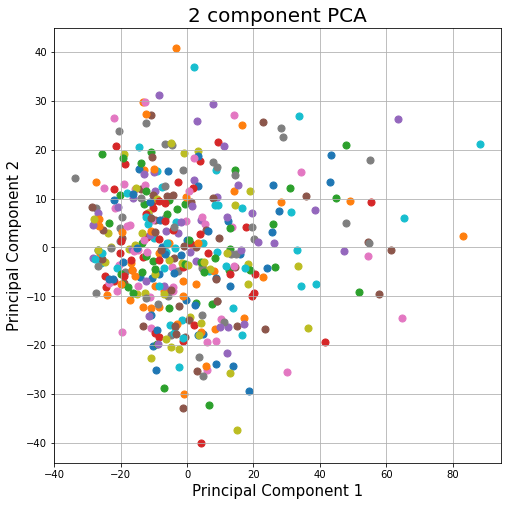

In [31]:
#scatterplot 
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = tcgc_pivot.index.values
#colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf['patient_id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               
               , s = 50)
#ax.legend(targets)
ax.grid()

In [32]:
#MAD analiza tcgc_pivot dataseta

tcgc_mad=tcgc_pivot.mad()

tcgc_mad.values

tcgc_mad_values=tcgc_mad.values
tcgc_mad_index=tcgc_mad.index
tcgc_mad_values

array([20.61981125,  4.46287073,  1.56141441, ...,  6.78358001,
        0.02618213,  3.23443101])

In [33]:
tcgc_important_features=[]
tcgc_important_values=[]
treshold=0.5
for i in range(2577):
    if(tcgc_mad_values[i]<=treshold):
        #print(tcgc_mad_index[i])
        tcgc_important_values.append(tcgc_mad_values[i])
        tcgc_important_features.append(tcgc_mad_index[i][1])
    


In [34]:
print(len(tcgc_important_values))
print(len(tcgc_important_features))

540
540


In [35]:
#MAD analiza je pokazala da postoji 540 značajnih gena (značajki)
tcgc_important_features

['AADACL2',
 'AADACL3',
 'AADACL4',
 'AANAT',
 'ABCA12',
 'ABCA13',
 'ABCB6',
 'ABCB9',
 'ABCC12',
 'ABCC13',
 'ABCC8',
 'ABCD2',
 'ABCG4',
 'ACAD11',
 'ACER1',
 'ACOT11',
 'ACOT6',
 'ACOXL',
 'ACSBG1',
 'ACSBG2',
 'ACSM4',
 'ACY1',
 'ADAD1',
 'ADAD2',
 'ADCY2',
 'ADH7',
 'ADSL',
 'AK5',
 'ALAS2',
 'ALDH1L2',
 'ALG11',
 'ALOX12',
 'ALOX12B',
 'ALOX15',
 'ALOXE3',
 'AMPD1',
 'AMT',
 'AMY1A',
 'AMY1B',
 'AMY1C',
 'AMY2A',
 'AQP12A',
 'AQP12B',
 'AQP2',
 'ARSH',
 'AS3MT',
 'ASMT',
 'ASNS',
 'ATP13A4',
 'ATP13A5',
 'ATP1A3',
 'ATP1A4',
 'ATP1B4',
 'ATP2A1',
 'ATP2B3',
 'ATP4A',
 'ATP4B',
 'ATP6V0A4',
 'ATP6V0C',
 'ATP6V1B1',
 'ATP6V1C2',
 'ATP6V1G2',
 'ATP6V1G3',
 'ATP8A2',
 'ATP8B4',
 'B3GALT5',
 'B3GAT2',
 'B3GNT4',
 'B3GNT6',
 'BCKDHA',
 'BEST2',
 'BEST3',
 'BEST4',
 'BSND',
 'CA10',
 'CA6',
 'CA7',
 'CA8',
 'CACNA1A',
 'CACNA1B',
 'CACNA1C',
 'CACNA1E',
 'CACNA1F',
 'CACNA1G',
 'CACNA1S',
 'CACNA2D2',
 'CACNA2D4',
 'CACNB1',
 'CACNB4',
 'CACNG2',
 'CACNG3',
 'CACNG5',
 'CACNG6',
 'CACN

In [36]:
#tcgc pivot tablica sa samo znacajnim znacajkama nakon MAD analize

tcgc_pivot.columns= [''.join(str(s).strip('tpm_unstranded') for s in col if s) for col in tcgc_pivot.columns]

tcgc_pivot
tcgc_mad_features=tcgc_pivot[tcgc_important_features]
tcgc_mad_features

,AADACL2,AADACL3,AADACL4,AANAT,ABCA12,ABCA13,ABCB6,ABCB9,ABCC12,ABCC13,...,TRPM6,TRPV3,TRPV5,TYR,UCP1,UCP3,UGT2A1,UGT2A2,XYLT1,ZACN
patient_id,,,,,,,,,,,,,,,,,,,,,
0010d2-52db-4b15-a750-dd57d148520b,0.0000,0.0,0.0000,0.5424,0.0000,0.0024,0.6740,0.3892,0.0000,0.0,...,0.0098,0.0000,0.0000,1.5958,0.0277,0.2291,0.0000,0.0,0.1583,0.0313
0036fcec-eaed-430b-9a23-5efb2d2cc7f2,0.0117,0.0,0.0000,0.3838,0.1414,0.0124,0.1249,1.1650,0.0000,0.0,...,0.0064,0.0185,1.3372,0.0000,0.0000,0.3895,0.0151,0.0,0.6825,0.0412
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee,0.0000,0.0,0.0000,0.0556,0.0062,0.0000,0.0805,0.0451,0.0000,0.0,...,0.1173,0.0000,0.0000,0.0000,0.0000,0.1794,0.0000,0.0,0.0594,0.0000
00ab5e4-51b3-4dc3-ae27-106496e90687,0.0000,0.0,0.0000,0.0424,0.0190,0.0048,0.2632,0.1993,0.0000,0.0,...,0.0397,0.0000,0.0000,0.0000,0.0000,0.1642,0.0000,0.0,0.2143,0.0212
00fb4b52-e6a4-4ad9-bbed-584e25851aca,0.0000,0.0,0.0000,0.0781,0.0000,0.0118,0.5611,0.4690,0.0065,0.0,...,0.0183,0.0234,0.0000,0.4332,0.0000,0.3365,0.0000,0.0,0.3598,0.0130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c,0.0000,0.0,0.0000,0.1147,0.0086,0.0043,0.4435,0.3784,0.0000,0.0,...,0.0090,0.0086,0.0000,0.0000,0.0000,0.1235,0.0000,0.0,0.0372,0.0383
fe9e4c81-7149-4cfd-b1a2-60884268988b,0.0000,0.0,0.0000,0.0316,0.0071,0.0393,0.2489,1.0823,0.0000,0.0,...,0.0964,0.0355,0.3010,0.0000,0.0000,0.6127,0.0000,0.0,0.0984,0.0000
feb06cd1-e6f5-4e39-9b19-a6479f751c38,0.0000,0.0,0.0351,0.0514,0.0058,0.0145,0.5956,0.4623,0.0064,0.0,...,0.0181,0.0000,0.0000,0.0000,0.0000,0.9785,0.0141,0.0,0.0649,0.0129


In [37]:
tcgc_mad_features['patient_id2'] = tcgc_mad_features.index
tcgc_mad_features

C:\Users\zg\AppData\Local\Temp/ipykernel_896/1011736379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgc_mad_features['patient_id2'] = tcgc_mad_features.index


,AADACL2,AADACL3,AADACL4,AANAT,ABCA12,ABCA13,ABCB6,ABCB9,ABCC12,ABCC13,...,TRPV3,TRPV5,TYR,UCP1,UCP3,UGT2A1,UGT2A2,XYLT1,ZACN,patient_id2
patient_id,,,,,,,,,,,,,,,,,,,,,
0010d2-52db-4b15-a750-dd57d148520b,0.0000,0.0,0.0000,0.5424,0.0000,0.0024,0.6740,0.3892,0.0000,0.0,...,0.0000,0.0000,1.5958,0.0277,0.2291,0.0000,0.0,0.1583,0.0313,0010d2-52db-4b15-a750-dd57d148520b
0036fcec-eaed-430b-9a23-5efb2d2cc7f2,0.0117,0.0,0.0000,0.3838,0.1414,0.0124,0.1249,1.1650,0.0000,0.0,...,0.0185,1.3372,0.0000,0.0000,0.3895,0.0151,0.0,0.6825,0.0412,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee,0.0000,0.0,0.0000,0.0556,0.0062,0.0000,0.0805,0.0451,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.1794,0.0000,0.0,0.0594,0.0000,003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee
00ab5e4-51b3-4dc3-ae27-106496e90687,0.0000,0.0,0.0000,0.0424,0.0190,0.0048,0.2632,0.1993,0.0000,0.0,...,0.0000,0.0000,0.0000,0.0000,0.1642,0.0000,0.0,0.2143,0.0212,00ab5e4-51b3-4dc3-ae27-106496e90687
00fb4b52-e6a4-4ad9-bbed-584e25851aca,0.0000,0.0,0.0000,0.0781,0.0000,0.0118,0.5611,0.4690,0.0065,0.0,...,0.0234,0.0000,0.4332,0.0000,0.3365,0.0000,0.0,0.3598,0.0130,00fb4b52-e6a4-4ad9-bbed-584e25851aca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c,0.0000,0.0,0.0000,0.1147,0.0086,0.0043,0.4435,0.3784,0.0000,0.0,...,0.0086,0.0000,0.0000,0.0000,0.1235,0.0000,0.0,0.0372,0.0383,fd5435d-07a2-4c95-b2b6-4a02c2a79d9c
fe9e4c81-7149-4cfd-b1a2-60884268988b,0.0000,0.0,0.0000,0.0316,0.0071,0.0393,0.2489,1.0823,0.0000,0.0,...,0.0355,0.3010,0.0000,0.0000,0.6127,0.0000,0.0,0.0984,0.0000,fe9e4c81-7149-4cfd-b1a2-60884268988b
feb06cd1-e6f5-4e39-9b19-a6479f751c38,0.0000,0.0,0.0351,0.0514,0.0058,0.0145,0.5956,0.4623,0.0064,0.0,...,0.0000,0.0000,0.0000,0.0000,0.9785,0.0141,0.0,0.0649,0.0129,feb06cd1-e6f5-4e39-9b19-a6479f751c38


In [38]:
# Cox analiza spajanje podataka sa clinical.tsv datasetom

In [39]:
#path='C:\Users\zg\Desktop\uzop\tcgc druge dvije'

clinical=pd.read_csv('C:/Users/zg/Desktop/uzop/tcgc druge dvije/clinical.tsv', sep='\t')
clinical

,case_id,case_submitter_id,project_id,age_at_index,age_is_obfuscated,cause_of_death,cause_of_death_source,country_of_residence_at_enrollment,days_to_birth,days_to_death,...,treatment_arm,treatment_dose,treatment_dose_units,treatment_effect,treatment_effect_indicator,treatment_frequency,treatment_intent_type,treatment_or_therapy,treatment_outcome,treatment_type
0,491a3734-dcb8-4779-b098-0b5567f13f87,TCGA-WQ-A9G7,TCGA-LIHC,71,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
1,491a3734-dcb8-4779-b098-0b5567f13f87,TCGA-WQ-A9G7,TCGA-LIHC,71,'--,'--,'--,'--,'--,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
2,c6a74db2-cf97-4c7b-be8c-557ee27e1d43,TCGA-RC-A6M3,TCGA-LIHC,24,'--,'--,'--,'--,-8899,'--,...,'--,'--,'--,'--,'--,'--,'--,not reported,'--,"Radiation Therapy, NOS"
3,c6a74db2-cf97-4c7b-be8c-557ee27e1d43,TCGA-RC-A6M3,TCGA-LIHC,24,'--,'--,'--,'--,-8899,'--,...,'--,'--,'--,'--,'--,'--,'--,not reported,'--,"Pharmaceutical Therapy, NOS"
4,a61f823b-9164-4bd6-92f4-0a8d8ff0f55e,TCGA-DD-AAE6,TCGA-LIHC,59,'--,'--,'--,'--,-21764,'--,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,6a93206a-c25c-4e45-b0ba-0a21bd8253b6,TCGA-CC-5258,TCGA-LIHC,48,'--,'--,'--,'--,-17586,129,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
738,592ef526-176a-42e0-bbeb-fb62d369a343,TCGA-BC-A10S,TCGA-LIHC,81,'--,'--,'--,'--,-29842,1423,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Radiation Therapy, NOS"
739,592ef526-176a-42e0-bbeb-fb62d369a343,TCGA-BC-A10S,TCGA-LIHC,81,'--,'--,'--,'--,-29842,1423,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"
740,61902cb6-b041-48ac-aacc-483a28949865,TCGA-CC-5264,TCGA-LIHC,71,'--,'--,'--,'--,-25979,102,...,'--,'--,'--,'--,'--,'--,'--,no,'--,"Pharmaceutical Therapy, NOS"


In [40]:
patient_vital_status=clinical[['case_id','vital_status', 'days_to_death']]
patient_vital_status = patient_vital_status.rename(columns={'case_id': 'patient_id2'})
#clinical
patient_vital_status

,patient_id2,vital_status,days_to_death
0,491a3734-dcb8-4779-b098-0b5567f13f87,Alive,'--
1,491a3734-dcb8-4779-b098-0b5567f13f87,Alive,'--
2,c6a74db2-cf97-4c7b-be8c-557ee27e1d43,Alive,'--
3,c6a74db2-cf97-4c7b-be8c-557ee27e1d43,Alive,'--
4,a61f823b-9164-4bd6-92f4-0a8d8ff0f55e,Alive,'--
...,...,...,...
737,6a93206a-c25c-4e45-b0ba-0a21bd8253b6,Dead,129
738,592ef526-176a-42e0-bbeb-fb62d369a343,Dead,1423
739,592ef526-176a-42e0-bbeb-fb62d369a343,Dead,1423
740,61902cb6-b041-48ac-aacc-483a28949865,Dead,102


In [41]:
#patient_vital_status
#tcgc_mad_features

In [42]:
# niti jedan patient_id se ne pojavljuje u clinical.tsv datoteci
# daljni podaci vital_status i days_to_death su umjetno stvoreni
#just_tcgc_patient_ids=[]
#just_tcgc_vital_status=[]
#just_tcgc_days_to_death=[]

#patient_ids=patient_vital_status['patient_id2']
#vital_status=patient_vital_status['vital_status']
#days_to_death=patient_vital_status['days_to_death']

#tcgc_mad_features_list=tcgc_mad_features.index.tolist()

#for patient in patient_ids:
#    print(patient)
#    print(patient in tcgc_mad_features_list)
#    if patient in tcgc_mad_features_list:
#        curr_index=tcgc_mad_features_list.index(patient)
#        
#        just_tcgc_patient_ids.append(patient)
#        just_tcgc_vital_status.append(vital_status[curr_index])
#        just_tcgc_days_to_death.append(days_to_death[curr_index])

In [43]:
#just_tcgc_patient_ids

In [44]:
#tcgc_mad_features_list

In [45]:
#tcgc_mad_features_list.index('491a3734-dcb8-4779-b098-0b5567f13f87')

In [46]:
#0 mrtav
#1 ziv


import numpy as np 
np.random.seed(444) 
dead_alive = np.random.choice(  
     a=[0, 1],  
     size=423,  
     p=[0.7, 0.3]  
 ) 
dead_alive

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [70]:
days_to_death_random=[]
days_to_death=patient_vital_status['days_to_death']

da=[]
for i in days_to_death:
    if (i.isnumeric()):
        days_to_death_random.append(i)
        da.append(0)
    else:
        days_to_death_random.append(0)
        da.append(1)
for i in days_to_death:
    if (i.isnumeric()):
        days_to_death_random.append(i)

In [71]:
days_to_death_random=days_to_death_random[0:423]
len(days_to_death_random)

423

In [72]:
tcgc_mad_features

,AADACL2,AADACL3,AADACL4,AANAT,ABCA12,ABCA13,ABCB6,ABCB9,ABCC12,ABCC13,...,TRPV5,TYR,UCP1,UCP3,UGT2A1,UGT2A2,XYLT1,ZACN,days_to_death,vital_status
patient_id,,,,,,,,,,,,,,,,,,,,,
0010d2-52db-4b15-a750-dd57d148520b,0.0000,0.0,0.0000,0.5424,0.0000,0.0024,0.6740,0.3892,0.0000,0.0,...,0.0000,1.5958,0.0277,0.2291,0.0000,0.0,0.1583,0.0313,-,1
0036fcec-eaed-430b-9a23-5efb2d2cc7f2,0.0117,0.0,0.0000,0.3838,0.1414,0.0124,0.1249,1.1650,0.0000,0.0,...,1.3372,0.0000,0.0000,0.3895,0.0151,0.0,0.6825,0.0412,-,1
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee,0.0000,0.0,0.0000,0.0556,0.0062,0.0000,0.0805,0.0451,0.0000,0.0,...,0.0000,0.0000,0.0000,0.1794,0.0000,0.0,0.0594,0.0000,-,0
00ab5e4-51b3-4dc3-ae27-106496e90687,0.0000,0.0,0.0000,0.0424,0.0190,0.0048,0.2632,0.1993,0.0000,0.0,...,0.0000,0.0000,0.0000,0.1642,0.0000,0.0,0.2143,0.0212,-,0
00fb4b52-e6a4-4ad9-bbed-584e25851aca,0.0000,0.0,0.0000,0.0781,0.0000,0.0118,0.5611,0.4690,0.0065,0.0,...,0.0000,0.4332,0.0000,0.3365,0.0000,0.0,0.3598,0.0130,-,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c,0.0000,0.0,0.0000,0.1147,0.0086,0.0043,0.4435,0.3784,0.0000,0.0,...,0.0000,0.0000,0.0000,0.1235,0.0000,0.0,0.0372,0.0383,-,0
fe9e4c81-7149-4cfd-b1a2-60884268988b,0.0000,0.0,0.0000,0.0316,0.0071,0.0393,0.2489,1.0823,0.0000,0.0,...,0.3010,0.0000,0.0000,0.6127,0.0000,0.0,0.0984,0.0000,-,0
feb06cd1-e6f5-4e39-9b19-a6479f751c38,0.0000,0.0,0.0351,0.0514,0.0058,0.0145,0.5956,0.4623,0.0064,0.0,...,0.0000,0.0000,0.0000,0.9785,0.0141,0.0,0.0649,0.0129,757,1


In [73]:
#tcgc dataset na kojemu su vital_status i days_to_death stupci umjetno stvoreni
#0 mrtav
#1 ziv
da=pd.DataFrame(dead_alive)
dtd=pd.DataFrame(days_to_death_random)
tcgc_mad_features['days_to_death']=dtd.values
tcgc_mad_features['vital_status']=da.values

tcgc_mad_features=tcgc_mad_features.drop(['patient_id2'], axis=1)
tcgc_mad_features

,AADACL2,AADACL3,AADACL4,AANAT,ABCA12,ABCA13,ABCB6,ABCB9,ABCC12,ABCC13,...,TRPV5,TYR,UCP1,UCP3,UGT2A1,UGT2A2,XYLT1,ZACN,days_to_death,vital_status
patient_id,,,,,,,,,,,,,,,,,,,,,
0010d2-52db-4b15-a750-dd57d148520b,0.0000,0.0,0.0000,0.5424,0.0000,0.0024,0.6740,0.3892,0.0000,0.0,...,0.0000,1.5958,0.0277,0.2291,0.0000,0.0,0.1583,0.0313,0,1
0036fcec-eaed-430b-9a23-5efb2d2cc7f2,0.0117,0.0,0.0000,0.3838,0.1414,0.0124,0.1249,1.1650,0.0000,0.0,...,1.3372,0.0000,0.0000,0.3895,0.0151,0.0,0.6825,0.0412,0,1
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee,0.0000,0.0,0.0000,0.0556,0.0062,0.0000,0.0805,0.0451,0.0000,0.0,...,0.0000,0.0000,0.0000,0.1794,0.0000,0.0,0.0594,0.0000,0,0
00ab5e4-51b3-4dc3-ae27-106496e90687,0.0000,0.0,0.0000,0.0424,0.0190,0.0048,0.2632,0.1993,0.0000,0.0,...,0.0000,0.0000,0.0000,0.1642,0.0000,0.0,0.2143,0.0212,0,0
00fb4b52-e6a4-4ad9-bbed-584e25851aca,0.0000,0.0,0.0000,0.0781,0.0000,0.0118,0.5611,0.4690,0.0065,0.0,...,0.0000,0.4332,0.0000,0.3365,0.0000,0.0,0.3598,0.0130,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c,0.0000,0.0,0.0000,0.1147,0.0086,0.0043,0.4435,0.3784,0.0000,0.0,...,0.0000,0.0000,0.0000,0.1235,0.0000,0.0,0.0372,0.0383,0,0
fe9e4c81-7149-4cfd-b1a2-60884268988b,0.0000,0.0,0.0000,0.0316,0.0071,0.0393,0.2489,1.0823,0.0000,0.0,...,0.3010,0.0000,0.0000,0.6127,0.0000,0.0,0.0984,0.0000,0,0
feb06cd1-e6f5-4e39-9b19-a6479f751c38,0.0000,0.0,0.0351,0.0514,0.0058,0.0145,0.5956,0.4623,0.0064,0.0,...,0.0000,0.0000,0.0000,0.9785,0.0141,0.0,0.0649,0.0129,757,1


In [74]:
### cox analiza postoji problem zbog prevelike kovarijance među značajkama
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi

treshold=0.05  #kao u clanku

cph = CoxPHFitter()
cph.fit(tcgc_mad_features, duration_col='days_to_death', event_col='vital_status')

cph.print_summary() 

C:\Users\zg\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:1102: ConvergenceWarning: Column(s) ['AMY1A', 'AMY1C', 'GABRA1', 'GRXCR1', 'HTR3D', 'HYI', 'KCNG4', 'KCNK18', 'KCNK4', 'PGAM2', 'PIGY', 'SCN10A', 'SULT1A4', 'UGT2A2'] have very low variance. This may harm convergence. 1) Are you using formula's? Did you mean to add '-1' to the end. 2) Try dropping this redundant column before fitting if convergence fails.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\zg\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:800: RuntimeWarning: invalid value encountered in true_divide
  return (X - mean) / std
C:\Users\zg\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:992: ConvergenceWarning: Your dataset has more variables than samples. Even with a penalizer (which you must use), convergence is not guaranteed.

  warnings.warn(warning_text, ConvergenceWarning)
C:\Users\zg\Anaconda3\lib\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: 

ConvergenceError: Convergence halted due to matrix inversion problems. Suspicion is high collinearity. Please see the following tips in the lifelines documentation: https://lifelines.readthedocs.io/en/latest/Examples.html#problems-with-convergence-in-the-cox-proportional-hazard-modelMatrix is singular.

In [ ]:
#816 gena koje se koristilo u clanku
#nastavio sam raditi sa 540 gena koje sam dobio sa mad analizom
#genes_article=pd.read_csv('C:/Users/zg/Desktop/uzop/genes_article.csv', sep=',')
#genes_article

In [75]:
##PCA analiza tcgc_mad skupa podataka

from sklearn.preprocessing import StandardScaler

columns=[]

for col in tcgc_mad_features.columns:
    columns.append(col)
    
    
features = columns[0:]
# odvajanje značajki i vrijednosti
x = tcgc_mad_features.loc[:, features].values
#print(x)
# Separating out the target
y = tcgc_mad_features.index.values
#print(y)
#skaliranje značajki
x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, pd.Series(tcgc_mad_features.index.values)], axis = 1)



finalDf.to_csv('PCA_tcgc.csv')
finalDf = finalDf.rename(columns={0: 'patient_id'})
finalDf

,principal component 1,principal component 2,patient_id
0,-2.985300,0.344856,0010d2-52db-4b15-a750-dd57d148520b
1,1.964809,-0.089549,0036fcec-eaed-430b-9a23-5efb2d2cc7f2
2,-6.626098,2.113039,003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee
3,-4.728180,1.501756,00ab5e4-51b3-4dc3-ae27-106496e90687
4,-2.027841,1.081430,00fb4b52-e6a4-4ad9-bbed-584e25851aca
...,...,...,...
418,-4.083001,1.250196,fd5435d-07a2-4c95-b2b6-4a02c2a79d9c
419,-2.479086,0.240056,fe9e4c81-7149-4cfd-b1a2-60884268988b
420,-2.893258,-0.225735,feb06cd1-e6f5-4e39-9b19-a6479f751c38
421,-4.485356,1.206746,ff12abd3-0f45-4063-afa7-fa5cad973159


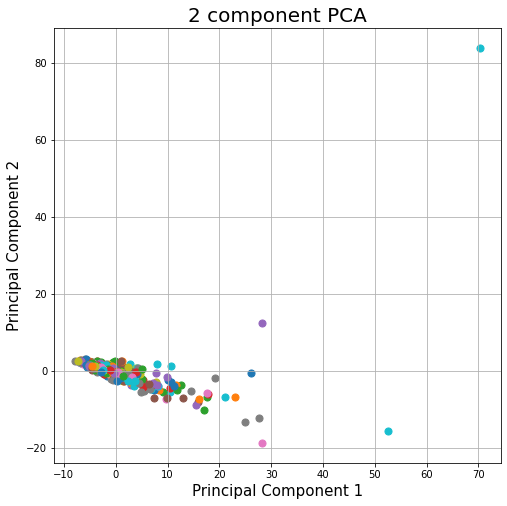

In [76]:
#scatterplot 

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = tcgc_pivot.index.values
#colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf['patient_id'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               
               , s = 50)
#ax.legend(targets)
ax.grid()

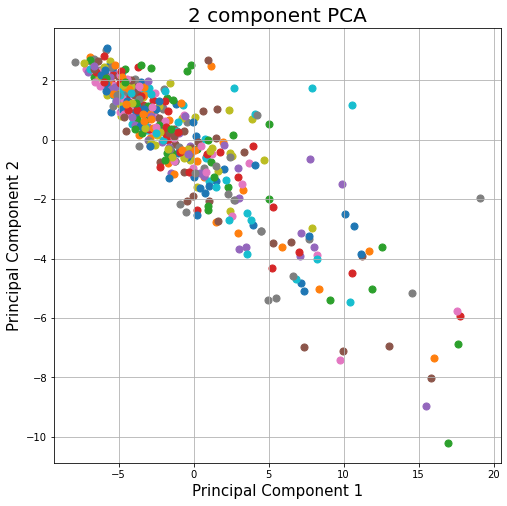

In [81]:
#micanje outliera
#scatterplot bet outliera

finalDf2 = finalDf.loc[finalDf['principal component 1'] < 20]


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = tcgc_pivot.index.values
#colors = ['r', 'g', 'b']
for target in targets:
    indicesToKeep = finalDf2['patient_id'] == target
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               
               , s = 50)
#ax.legend(targets)
ax.grid()

C:\Users\zg\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zg\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\zg\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zg\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable 

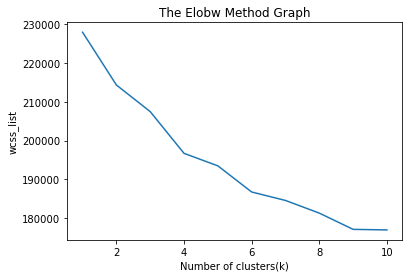

In [90]:
#k bi trebao doci 3

from sklearn.cluster import KMeans  
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

wcss_list= []   

x = tcgc_mad_features.loc[:, features].values
x = StandardScaler().fit_transform(x)

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  


In [93]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  

C:\Users\zg\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\zg\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


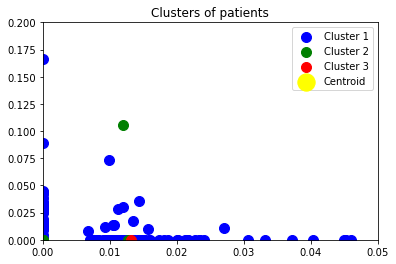

In [106]:
mtp.xlim(0,0.05)
mtp.ylim(0,0.2)
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster  
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of patients')  
mtp.legend()  
mtp.show()  

In [107]:
#90 najznacajnijih gena
# uzeto je prvih 90 gena


#first_n_column  = df.iloc[: , :N]

tcgc_mad_90=tcgc_mad_features.iloc[: , :90]
tcgc_mad_90['days_to_death']=dtd.values
tcgc_mad_90['vital_status']=da.values
tcgc_mad_90

C:\Users\zg\AppData\Local\Temp/ipykernel_896/1790119624.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgc_mad_90['days_to_death']=dtd.values
C:\Users\zg\AppData\Local\Temp/ipykernel_896/1790119624.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcgc_mad_90['vital_status']=da.values


,AADACL2,AADACL3,AADACL4,AANAT,ABCA12,ABCA13,ABCB6,ABCB9,ABCC12,ABCC13,...,CACNA1F,CACNA1G,CACNA1S,CACNA2D2,CACNA2D4,CACNB1,CACNB4,CACNG2,days_to_death,vital_status
patient_id,,,,,,,,,,,,,,,,,,,,,
0010d2-52db-4b15-a750-dd57d148520b,0.0000,0.0,0.0000,0.5424,0.0000,0.0024,0.6740,0.3892,0.0000,0.0,...,0.0325,0.0045,0.0149,0.1175,0.3315,0.0760,0.0363,0.0000,0,1
0036fcec-eaed-430b-9a23-5efb2d2cc7f2,0.0117,0.0,0.0000,0.3838,0.1414,0.0124,0.1249,1.1650,0.0000,0.0,...,0.0597,0.0411,0.0098,0.2089,1.3462,0.5996,0.0148,0.0000,0,1
003ad4b1-dc1b-49bc-8ce2-d6dbd1250fee,0.0000,0.0,0.0000,0.0556,0.0062,0.0000,0.0805,0.0451,0.0000,0.0,...,0.0173,0.0060,0.0000,0.0184,0.2167,0.0591,0.0033,0.0000,0,0
00ab5e4-51b3-4dc3-ae27-106496e90687,0.0000,0.0,0.0000,0.0424,0.0190,0.0048,0.2632,0.1993,0.0000,0.0,...,0.0264,0.0091,0.0151,0.0561,0.5875,0.1673,0.0356,0.0000,0,0
00fb4b52-e6a4-4ad9-bbed-584e25851aca,0.0000,0.0,0.0000,0.0781,0.0000,0.0118,0.5611,0.4690,0.0065,0.0,...,0.0324,0.0000,0.0186,0.4487,0.4967,0.3719,0.1843,0.0000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fd5435d-07a2-4c95-b2b6-4a02c2a79d9c,0.0000,0.0,0.0000,0.1147,0.0086,0.0043,0.4435,0.3784,0.0000,0.0,...,0.0238,0.0000,0.0000,0.2154,0.1547,0.9294,0.0161,0.0000,0,0
fe9e4c81-7149-4cfd-b1a2-60884268988b,0.0000,0.0,0.0000,0.0316,0.0071,0.0393,0.2489,1.0823,0.0000,0.0,...,0.0000,0.0000,0.0000,0.3247,0.0639,0.1633,0.0057,0.0000,0,0
feb06cd1-e6f5-4e39-9b19-a6479f751c38,0.0000,0.0,0.0351,0.0514,0.0058,0.0145,0.5956,0.4623,0.0064,0.0,...,0.0000,0.0055,0.0000,0.1361,0.0668,0.3276,0.0077,0.0085,757,1


In [108]:
#svc
#model je istreniran, nije provjereno koliko je tocan
from sklearn.svm import SVC

x=tcgc_mad_90.iloc[: , :91].values
y=y_predict #uzeto iz klasteriranja u koraku gore
svm_lin = SVC(kernel='linear')
svm_lin=svm_lin.fit(x, y)
print('tezina w0 iznosi = ' + str( svm_lin.intercept_))
print('tezine w iznose = ' + str( svm_lin.coef_))
print('dualni koeficijenti iznose = ' + str( svm_lin.dual_coef_))

tezina w0 iznosi = [2.9128166  1.16606079 0.75735826]
tezine w iznose = [[ 2.40282543e-03 -6.88292344e-04  5.84284265e-04  1.95405367e-02
  -1.67911776e-02 -8.09385710e-02 -3.34005024e-03 -2.67859856e-02
  -1.18630321e-02  3.17141838e-03  4.11838418e-03 -2.31231863e-01
  -6.02179850e-03 -1.85288474e-02 -2.75277019e-02 -1.31435687e-01
  -8.65164260e-03 -5.00300431e-02 -3.71755253e-02 -1.40374122e-02
  -3.04520933e-02 -4.40463727e-03 -8.34105074e-02 -8.69730553e-02
  -1.89305300e-03  5.52244340e-02 -1.19917717e-01 -2.35850165e-03
  -1.61608048e-02  1.53577019e-02 -7.69917751e-02 -1.43403471e-01
   6.33751868e-03 -4.90992211e-02  1.74398934e-02 -5.25085257e-02
  -1.11083025e-02  0.00000000e+00 -1.39393138e-03  0.00000000e+00
  -4.51044325e-03  0.00000000e+00 -4.75837660e-04 -1.11094684e-04
  -1.98638954e-03  7.22362174e-03 -1.47613084e-02 -1.27672818e-02
   1.51006731e-02 -7.80920891e-03  2.70557508e-02 -2.28570699e-02
   2.24890163e-04  2.51945200e-03 -7.84028350e-03 -1.88289248e-02
   5

In [110]:
from sklearn.svm import SVC

x=tcgc_mad_90.iloc[: , :91].values
y=y_predict #uzeto iz klasteriranja u koraku gore
svm_rbf = SVC(kernel='rbf')
svm_rbf=svm_rbf.fit(x, y)
print('tezina w0 iznosi = ' + str( svm_rbf.intercept_))
print('dualni koeficijenti iznose = ' + str( svm_rbf.dual_coef_))

tezina w0 iznosi = [0.99802282 0.99920541 0.99866661]
dualni koeficijenti iznose = [[ 6.07577432e-02  5.95756890e-01  2.00552750e-01  9.57777047e-01
   1.38970747e-03  0.00000000e+00  1.06486719e-01  5.34912677e-02
   1.86531255e-02  4.89815969e-02  3.08916363e-01  2.09193894e-02
   1.09966073e-03  9.96359834e-01  2.10448791e-02  9.59381032e-01
   1.13108203e-01  3.64751991e-01  2.22489913e-02  1.35721970e-01
   1.26008385e-02  0.00000000e+00 -1.00000000e+00 -1.00000000e+00
  -1.00000000e+00 -1.00000000e+00 -1.00000000e+00 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   5.95767971e-04  5.94775203e-04  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  9.98809457e-01  1.33240190e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  9.98667598e-01 -1.00000